## Imports

#### Reading data from the csv file

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
emails = pd.read_csv("./emails.csv/emails.csv")
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)

import numpy as np
from IPython.display import display
import io

#### Read data into data frame 

In [2]:
headers = [header for header in emails.columns]
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(display(emails.head()))

Successfully loaded 517401 rows and 2 columns!


,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700..."
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ..."
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700..."
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700..."
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700..."


None


#### Sample Email in one cell

In [3]:
print(emails.loc[0]["message"])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


### Seperate email into colums

In [4]:
import email

def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header) 
    print("Successfully retrieved header information!")
    return headers
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"]    
headers = get_headers(emails, header_names)

Successfully retrieved header information!


In [5]:
def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages
msg_body = get_messages(emails)
emails["Message-Body"] = msg_body

Successfully retrieved message body from e-mails!


In [6]:
x_from = pd.DataFrame(headers["X-From"], columns = ["X-From"])
print(x_from.iloc[:1000]["X-From"].unique()[:10])
if "X-From" not in emails.columns:
    emails = pd.concat([emails, x_from], axis = 1, join = 'inner')

['Phillip K Allen' 'Ina Rangel'
 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'
 '"Bloomberg.com" <messenger@ecm.bloomberg.com>'
 '"Arthur O\'Donnell" <aod@newsdata.com>' 'critical.notice@Enron.com'
 'market-reply@LISTSERV.DOWJONES.COM' 'Rebecca W Cantrell'
 '"Earnings.com" <webmaster@earnings.com>' 'Paul Kaufman']


In [7]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]: 
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)        
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df
emails = add_name(df = emails, column = "file", labels = ["employee"])

Successfully added new column!


In [8]:
def add_headers(df, header_list):
    for label in header_list:
        df_new = pd.DataFrame(headers[label], columns = [label])
        if label not in df.columns:
            df = pd.concat([df, df_new], axis = 1)
    return df
remaining_headers = ["Date", "Subject", "X-To", "X-From", "X-Folder"]
emails = add_headers(df = emails, header_list = remaining_headers)
print("Here is the emails dataframe after appending all the relevant headers")
print(display(emails))

Here is the emails dataframe after appending all the relevant headers


,file,message,Message-Body,X-From,employee,Date,Subject,X-To,X-Folder
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail"
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 ...",traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail"
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700...",test successful. way to go!!!,Phillip K Allen,allen-p,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail
3,allen-p/_sent_mail/1000.,"Message-ID: <13505866.1075863688222.JavaMail.evans@thyme>\nDate: Mon, 23 Oct 2000 06:13:00 -0700...","randy,\n\n can you send me a schedule of the salary and level of everyone in the \nscheduling gr...",Phillip K Allen,allen-p,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,Randall L Gay,\Phillip_Allen_Dec2000\Notes Folders\'sent mail
4,allen-p/_sent_mail/1001.,"Message-ID: <30922949.1075863688243.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 05:07:00 -0700...",let's shoot for tuesday at 11:45.,Phillip K Allen,allen-p,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail
...,...,...,...,...,...,...,...,...,...
517396,zufferli-j/sent_items/95.,"Message-ID: <26807948.1075842029936.JavaMail.evans@thyme>\nDate: Wed, 28 Nov 2001 13:30:11 -0800...",this is a trade with oil-spec-hedge-ng (john lavorato's book) and john zufferli's book cand-pwr-...,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",zufferli-j,"Wed, 28 Nov 2001 13:30:11 -0800 (PST)",Trade with John Lavorato,"Loibl, Kori </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Kloibl>","\ExMerge - Zufferli, John\Sent Items"
517397,zufferli-j/sent_items/96.,"Message-ID: <25835861.1075842029959.JavaMail.evans@thyme>\nDate: Wed, 28 Nov 2001 12:47:48 -0800...","some of my position is with the alberta term book, i will send you only the positions that i hav...","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",zufferli-j,"Wed, 28 Nov 2001 12:47:48 -0800 (PST)",Gas Hedges,"Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Jlavora>","\ExMerge - Zufferli, John\Sent Items"
517398,zufferli-j/sent_items/97.,"Message-ID: <28979867.1075842029988.JavaMail.evans@thyme>\nDate: Wed, 28 Nov 2001 07:20:00 -0800...","2\n\n -----original message-----\nfrom: \tdoucet, dawn \nsent:\twednesday, november 28, 2001 8:...","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",zufferli-j,"Wed, 28 Nov 2001 07:20:00 -0800 (PST)",RE: CONFIDENTIAL,"Doucet, Dawn </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Ddoucet>","\ExMerge - Zufferli, John\Sent Items"
517399,zufferli-j/sent_items/98.,"Message-ID: <22052556.1075842030013.JavaMail.evans@thyme>\nDate: Tue, 27 Nov 2001 11:52:45 -0800...",analyst\t\t\t\t\trank\n\nstephane brodeur\t\t\t1\nchad clark\t\t\t\t1\nian cooke\t\t\t\t3\nlon d...,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JZUFFER>",zufferli-j,"Tue, 27 Nov 2001 11:52:45 -0800 (PST)",Calgary Analyst/Associate,"Slone, Jeanie </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Jslone>","\ExMerge - Zufferli, John\Sent Items"


None


In [9]:
print(emails["X-Folder"].sample(7))

174824                  \Kevin_Hyatt_Mar2002\Hyatt, Kevin\Personal
472270                      \kate symes 6-27-02\Notes Folders\Sent
77799             \Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox
463568             \kate symes 6-27-02\Notes Folders\All documents
240817     \Steven_Kean_June2001_3\Notes Folders\Calendar\Untitled
129398     \Chris_Germany_Dec2000\Notes Folders\Discussion threads
235514    \Steven_Kean_June2001_2\Notes Folders\Archiving\Untitled
Name: X-Folder, dtype: object


## Top 40 Folder with Email Count

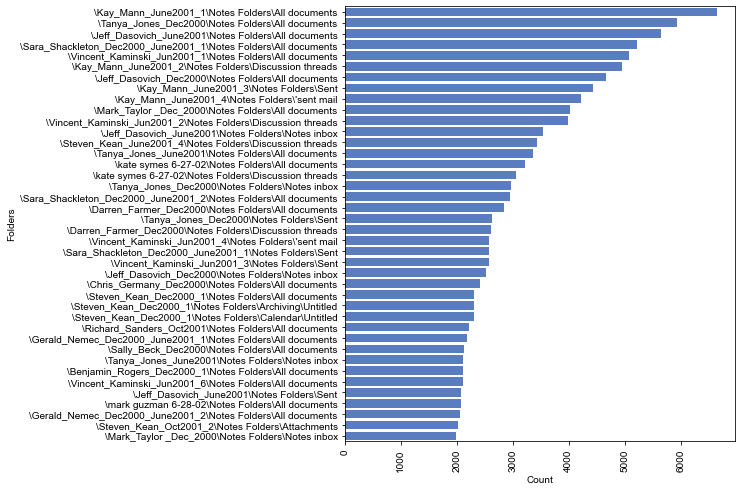

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = emails["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

## Top 8 Emails X-Folder for employee (williams-w3)

In [11]:
williams = emails[emails["employee"] == "williams-w3"]
williams["X-Folder"].value_counts()[:8]

\ExMerge - Williams III, Bill\Schedule Crawler             1398
\Williams III, Bill (Non-Privileged)\Bill Williams III     1022
\ExMerge - Williams III, Bill\Sent Items                    519
\ExMerge - Williams III, Bill\Inbox                         137
\ExMerge - Williams III, Bill\HR                             86
\ExMerge - Williams III, Bill\SymesEES                       81
\ExMerge - Williams III, Bill\Human Resources                45
\ExMerge - Williams III, Bill\Operations Committee/ISAS      19
Name: X-Folder, dtype: int64

## Top 40 Email count Employee wise

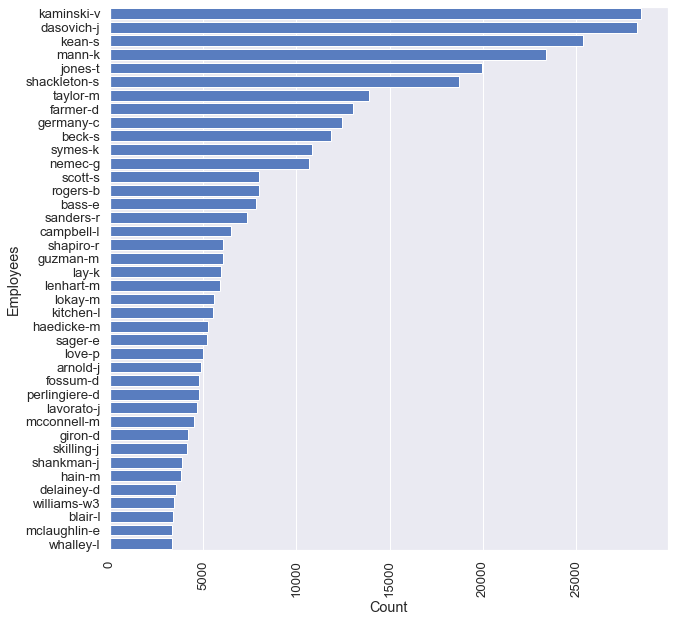

In [12]:
mail_count = emails["employee"].value_counts()
indices = mail_count.index
count = pd.DataFrame(mail_count)
count.rename(columns = {"employee": "Count"}, inplace = True)
count["Employees"] = indices
barplot(df = count[:40], X = "Count", Y = "Employees", figsize = (10, 10), color = 'b', orient = 'h', ylabel = "Employees", xlabel = "Count", font_scale = .8, rotation = 90)

### Convert Date to datetime

In [13]:
print(emails.iloc[:1]["Date"])
emails["Date"] = pd.to_datetime(emails["Date"], infer_datetime_format=True, utc=True)
print(emails.iloc[:1]["Date"])

0    Mon, 14 May 2001 16:39:00 -0700 (PDT)
Name: Date, dtype: object
0   2001-05-14 23:39:00+00:00
Name: Date, dtype: datetime64[ns, UTC]


## Number of Emails v/s Year

Text(0, 0.5, 'N emails')

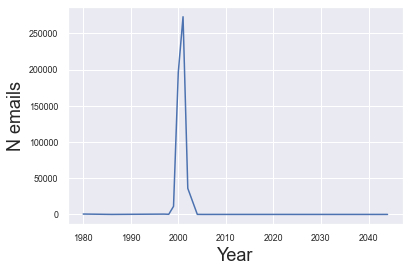

In [14]:
ax = emails.groupby(emails['Date'].dt.year)['Message-Body'].count().plot()
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)


## Number of Emails v/s Day of Week

Text(0, 0.5, 'N emails')

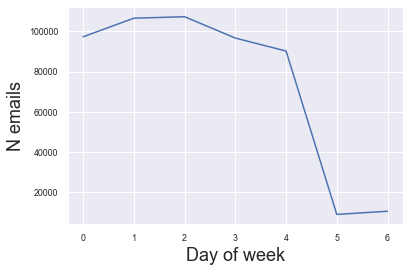

In [15]:
ax = emails.groupby(emails['Date'].dt.dayofweek)['Message-Body'].count().plot()
ax.set_xlabel('Day of week', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

## Number of Emails v/s Hour

Text(0, 0.5, 'N emails')

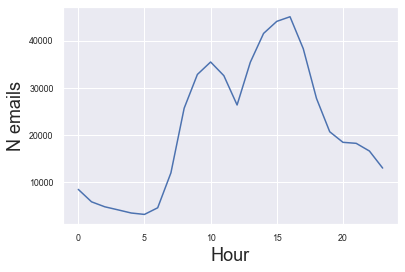

In [16]:
ax = emails.groupby(emails['Date'].dt.hour)['Message-Body'].count().plot()
ax.set_xlabel('Hour', fontsize=18)
ax.set_ylabel('N emails', fontsize=18)

## Count words in Subjects and content

In [17]:
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')
emails['subject_wc'] = emails['Subject'].map(lambda x: len(tokenizer.tokenize(x)))
emails['content_wc'] = emails['Message-Body'].map(lambda x: len(tokenizer.tokenize(x)))

In [18]:
grouped_by_people = emails.groupby('employee').agg({
        'Message-Body': 'count', 
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'Message-Body': 'N emails', 
                                  'subject_wc': 'Subject word count', 
                                  'content_wc': 'Content word count'}, inplace=True)
grouped_by_people.sort_values(by='N emails', ascending=False).head()

,N emails,Subject word count,Content word count
employee,,,
kaminski-v,28465,4.217530,255.906025
dasovich-j,28234,5.237373,603.393391
kean-s,25351,4.959331,490.837561
mann-k,23381,4.211796,207.195501
jones-t,19950,4.748221,185.462607


(-0.5, 799.5, 599.5, -0.5)

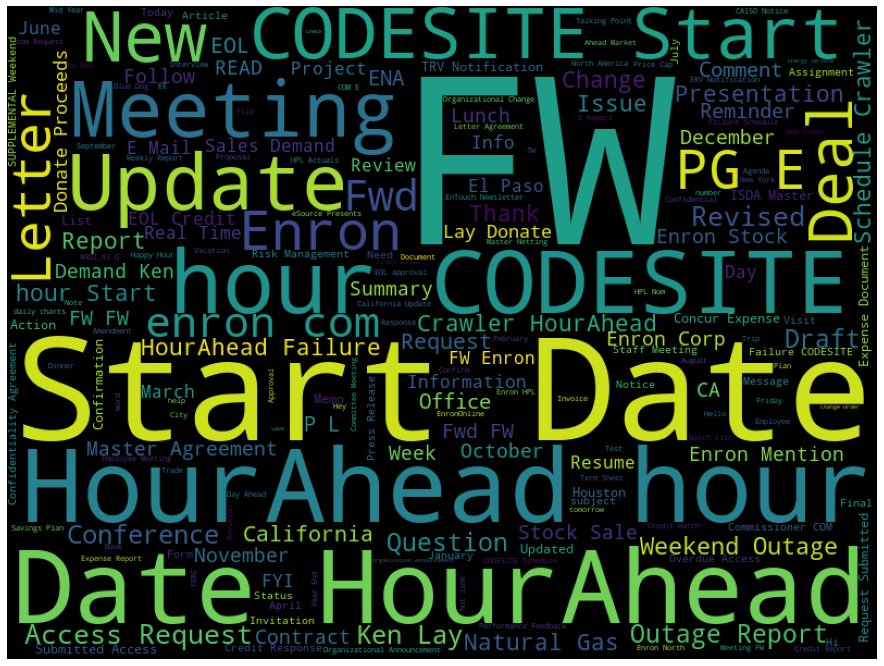

In [19]:
# !pip install wordcloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import wordcloud

subjects = ' '.join(emails['Subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

In [24]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item == None or item == '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      
emails["X-Folder"] = preprocess_folder(emails["X-Folder"])   

Folder cleaned!


In [25]:
unwanted_folders = ["all documents", "deleted items", "discussion threads", "sent", "deleted Items", "inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
emails = emails.loc[~emails['X-Folder'].isin(unwanted_folders)]
print(emails.iloc[:15]["X-Folder"].value_counts())

straw                   8
2000 conference         3
contacts                2
avaya                   1
active international    1
Name: X-Folder, dtype: int64


In [26]:
email_count = dict(emails["employee"].value_counts())
reduced_emails = [key for key, val in email_count.items() if val >= 2000]
emails = emails.loc[emails['employee'].isin(reduced_emails)]
print(emails["employee"].value_counts())


kean-s         5550
kaminski-v     4483
kitchen-l      4034
farmer-d       3786
williams-w3    2775
lokay-m        2554
taylor-m       2477
shapiro-r      2036
beck-s         2013
Name: employee, dtype: int64


## Missing Value Removal

In [27]:
emails.isnull().sum()

file            0
message         0
Message-Body    0
X-From          3
employee        0
Date            0
Subject         0
X-To            3
X-Folder        3
subject_wc      0
content_wc      0
dtype: int64

In [28]:
emails.dropna(inplace = True)
print("Rows with missing values have been removed")
emails.isnull().sum()


Rows with missing values have been removed


file            0
message         0
Message-Body    0
X-From          0
employee        0
Date            0
Subject         0
X-To            0
X-Folder        0
subject_wc      0
content_wc      0
dtype: int64

## Tokenize

In [29]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = row.split(" ")
    return tokens


### Remove using Regular Expression
The regular expressions, which includes punctuation marks and nonword characters need to be removed.

In [30]:
import re

def remove_reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', " ", token)
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens


## Stop Word Removal

In [31]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harshil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Assemble matrices
The assemble_bag() function will call the tokenize(), remove_reg_expressions(), stop_word_removal() functions to clean the data. Then it assembles a new dataframe containing all the unique words found in the text documents. It counts the word frequency and then returns the new dataframe.

In [32]:
def assemble_bag(data):
    data = data.apply(tokenize)
    #data = data.apply(stop_word_removal)
    data = data.apply(remove_reg_expressions)
    
    unique_tokens = []
    single_tokens = []

    for item in data:
        for token in item:
            if token in single_tokens:
                if token not in unique_tokens:
                    unique_tokens.append(token)
            else:
                single_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = unique_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in unique_tokens:
                df.iloc[i][token] += 1    
    return df

### Classification on 1 employee

In [33]:
employee = emails[emails["employee"] == "kaminski-v"]


In [34]:
def remove_folders(emails, n):
    # Returns the folders containing more than 'n' number of e-mails
    email_count = dict(emails["X-Folder"].value_counts())
    small_folders = [key for key, val in email_count.items() if val <= n]
    emails = emails.loc[~emails['X-Folder'].isin(small_folders)]
    return emails


In [88]:
n = 200
employee = remove_folders(employee, n)

In [89]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    class_le = LabelEncoder()
    # apply label encoder on the `Folder` column
    y = class_le.fit_transform(df['X-Folder'])
    df.loc[:,'y'] = y
    return df

In [90]:
label_encoder(employee)    
print("Randomly selected labels representing our folders")
unique_folders = employee["y"].unique()
print (unique_folders)

Randomly selected labels representing our folders
[1 2 4 0 3 5 6]


In [91]:
def sort(df):   
    df = df.sort_values(by = "Date", axis = 0)
    return df


In [92]:
employee = sort(employee)
print(display(employee.loc[:,("Date", "y", "X-Folder")][:10]))


,Date,y,X-Folder
210435,1999-12-10 14:43:00+00:00,2,management
209880,1999-12-10 17:17:00+00:00,1,ene_ect
221267,1999-12-10 18:46:00+00:00,5,resumes
210434,1999-12-12 15:22:00+00:00,2,management
210433,1999-12-13 10:08:00+00:00,2,management
210431,1999-12-14 07:51:00+00:00,2,management
210685,1999-12-14 08:17:00+00:00,2,management
210684,1999-12-14 08:22:00+00:00,2,management
211067,1999-12-14 10:14:00+00:00,4,projects
210683,1999-12-14 10:46:00+00:00,2,management


None


In [93]:
def prepare_features(df):
    from_bag = assemble_bag(df["X-From"])
    to_bag = assemble_bag(df["X-To"])
    message_bag = assemble_bag(df["Message-Body"])
    subject_bag = assemble_bag(df["Subject"])
    frames = [from_bag, subject_bag, to_bag, message_bag]
    X = pd.concat(frames, axis = 1, join = 'inner')
    X.drop(labels = [" ", ""], inplace = True, axis = 1)
    return X

In [94]:
X = prepare_features(employee)

In [95]:
X

,shirley,crenshaw,kevin,g,moore,office,of,the,chairman,enron,...,easo,change energy,formatting,incorrectly,worksheets,you please,pm to kaminski,prepare,work it,maria
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2865,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,0,1,0,0,0
2866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
2867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
def split_data(X, employee):
    # split data into training and testing sets
    training_size = int(len(employee) * 0.8)
    X_train = X[:training_size]
    X_test = X[training_size:]
    y_test = employee[training_size:]["y"]
    y_train = employee[:training_size]["y"]
    
    return X_train, X_test, y_test, training_size

In [113]:
import dask.dataframe as dd
X_train, X_test, y_test, training_size = split_data(X,employee)

In [114]:
from sklearn import preprocessing
import numpy as np

In [144]:
def fit(df, training_size, X_train):
    models = {}
    filtered_folders = []
    unique_folders = df["y"].unique()
    for folder in unique_folders:
        model = LogisticRegression(solver='lbfgs', max_iter=600)
        y_train = df[:training_size]["y"] == folder
        try:
            model.fit(X_train, y_train)
            model.decision_function(X_train)
            models[folder] = model
            filtered_folders.append(folder)
        except Exception:
            print(Exception.__class__.__name__)
            # pass
    return models, filtered_folders

In [117]:
models, filtered_folders = fit(employee,training_size , X_train)

In [118]:
models

{2: LogisticRegression(max_iter=600),
 1: LogisticRegression(max_iter=600),
 5: LogisticRegression(max_iter=600),
 4: LogisticRegression(max_iter=600),
 0: LogisticRegression(max_iter=600),
 3: LogisticRegression(max_iter=600),
 6: LogisticRegression(max_iter=600)}

In [119]:
def predict(X_test, models, filtered_folders):
    testing_probs = pd.DataFrame(columns = filtered_folders)
    for folder in filtered_folders:
        # Compute probability
        testing_probs[folder] = models[folder].predict_proba(X_test)[:,1]
    y_test_pred = testing_probs.idxmax(axis = 1)
    return y_test_pred

In [120]:
y_test_pred = predict(X_test, models, filtered_folders)
y_test_pred.head()

0    4
1    2
2    2
3    1
4    5
dtype: int64

In [121]:
y_test.head()

211089    4
211088    4
209976    2
209921    1
220828    5
Name: y, dtype: int32

In [122]:
y_test.shape

(574,)

In [123]:
class_le = LabelEncoder()
y = class_le.fit_transform(employee['X-Folder'])
y_test_pred = class_le.inverse_transform(y_test_pred)
y_test = class_le.inverse_transform(y_test)
y_ans = pd.DataFrame(columns=["given" , "predicted"])
y_ans["given"] = y_test
y_ans["predicted"] = y_test_pred

In [124]:
y_ans.head()

,given,predicted
0,projects,projects
1,projects,management
2,management,management
3,ene_ect,ene_ect
4,resumes,resumes


In [125]:
from sklearn.metrics import accuracy_score

def acc_score(y_test, y_test_pred):
    score = accuracy_score(y_test, y_test_pred)
    return score

In [126]:
acc_score(y_test, y_test_pred)

0.6515679442508711

In [138]:
%%time
employee_list = emails["employee"].unique()
num = 100

def classify_emails(data, folder_size, employee_list):
    results = pd.DataFrame(columns = folder_size)
    results["employee"] = employee_list
    for i, name in enumerate(employee_list):
        employee = data[data["employee"] == name]
        employee = remove_folders(employee, num)
        employee = label_encoder(employee)
        print("before")
        if len(employee["y"].unique()) < 2: 
            break
        print("After")
        X = prepare_features(employee)
        X_train, X_test, y_test, training_size = split_data(X, employee)
        models, filtered_folders = fit(employee, training_size, X_train)
        y_test_pred = predict(X_test, models, filtered_folders)
        score = acc_score(y_test, y_test_pred)
        print(score)

        class_le = LabelEncoder()
        y = class_le.fit_transform(employee['X-Folder'])
        y_test_pre = class_le.inverse_transform(y_test_pred)
        y_tes = class_le.inverse_transform(y_test)
        y_ans = pd.DataFrame(columns=["given" , "predicted"])
        y_ans["given"] = y_tes
        y_ans["predicted"] = y_test_pre
        y_ans.to_csv('./df_'+str(i)+'.csv')

        print(y_ans)
    return results

results = classify_emails(data = emails, folder_size = [num], employee_list = employee_list)
print(display(results))

before
After
0.8771929824561403
         given   predicted
0   recruiting  recruiting
1   recruiting  recruiting
2   recruiting  recruiting
3   recruiting  recruiting
4   recruiting  recruiting
5   recruiting  recruiting
6   recruiting  recruiting
7   recruiting      europe
8   recruiting  recruiting
9   recruiting      europe
10  recruiting  recruiting
11  recruiting  recruiting
12  recruiting  recruiting
13  recruiting  recruiting
14  recruiting  recruiting
15  recruiting  recruiting
16  recruiting  recruiting
17  recruiting      europe
18  recruiting  recruiting
19  recruiting  recruiting
20  recruiting  recruiting
21  recruiting  recruiting
22  recruiting  recruiting
23  recruiting      europe
24  recruiting  recruiting
25  recruiting  recruiting
26  recruiting  recruiting
27  recruiting  recruiting
28  recruiting  recruiting
29  recruiting  recruiting
30  recruiting  recruiting
31  recruiting  recruiting
32  recruiting  recruiting
33  recruiting  recruiting
34  recruiting  recruit

type
type
type
0.0678191489361702
            given    predicted
0         resumes      ene_ect
1         resumes   management
2         resumes      resumes
3         resumes      resumes
4         resumes      resumes
5         resumes      resumes
6         resumes      resumes
7         resumes      resumes
8         resumes      resumes
9         resumes      resumes
10        resumes      resumes
11        resumes   management
12        resumes      resumes
13        resumes   management
14        resumes      resumes
15        resumes      resumes
16        resumes      resumes
17        resumes      resumes
18        resumes       london
19        resumes   management
20        resumes      ene_ect
21        resumes      resumes
22        resumes   management
23        resumes      resumes
24        resumes     personal
25        resumes     projects
26        resumes      resumes
27        resumes      resumes
28        resumes       london
29        resumes      resumes
30   

type
type
0.07643312101910828
          given    predicted
0    california   california
1    california  attachments
2    california  attachments
3    california   california
4    california  attachments
5    california   california
6    california  attachments
7    california  attachments
8    california  attachments
9    california   california
10   california  attachments
11   california  attachments
12   california  attachments
13   california  attachments
14   california  attachments
15   california  attachments
16   california  attachments
17   california   california
18   california   california
19   california  attachments
20   california  attachments
21   california  attachments
22   california  attachments
23   california  attachments
24   california  attachments
25   california  attachments
26   california   california
27   california   california
28   california  attachments
29   california  attachments
30   california  attachments
31   california  attachments
32   californ

type
type
0.15601503759398497
          given        predicted
0           ooc              ooc
1           ooc             esvl
2           ooc             esvl
3           ooc             esvl
4           ooc             esvl
5           ooc              ooc
6           ooc              ooc
7           ooc              ooc
8           ooc              ooc
9           ooc              ooc
10          ooc              ooc
11          ooc              ooc
12          ooc              ooc
13          ooc              ooc
14          ooc              ooc
15          ooc              ooc
16          ooc              ooc
17          ooc              ooc
18          ooc              ooc
19          ooc              ooc
20          ooc              ooc
21          ooc              ooc
22          ooc              ooc
23          ooc              ooc
24          ooc              ooc
25          ooc              ooc
26          ooc              ooc
27          ooc              ooc
28          o

0.948051948051948
                   given            predicted
0    tw-commercial group  tw-commercial group
1    tw-commercial group  tw-commercial group
2    tw-commercial group  tw-commercial group
3    tw-commercial group  tw-commercial group
4    tw-commercial group  tw-commercial group
5    tw-commercial group  tw-commercial group
6    tw-commercial group  tw-commercial group
7    tw-commercial group  tw-commercial group
8    tw-commercial group             personal
9    tw-commercial group  tw-commercial group
10   tw-commercial group              systems
11   tw-commercial group              systems
12   tw-commercial group  tw-commercial group
13   tw-commercial group  tw-commercial group
14   tw-commercial group  tw-commercial group
15   tw-commercial group  tw-commercial group
16   tw-commercial group  tw-commercial group
17   tw-commercial group  tw-commercial group
18   tw-commercial group  tw-commercial group
19   tw-commercial group  tw-commercial group
20   tw-commerci

0.8596491228070176
       given   predicted
0   personal    personal
1   personal    personal
2   personal    personal
3   personal    personal
4   personal  california
5   personal    personal
6   personal    personal
7   personal    personal
8   personal    personal
9   personal    personal
10  personal    personal
11  personal    personal
12  personal    personal
13  personal    personal
14  personal    personal
15  personal    personal
16  personal    personal
17  personal    personal
18  personal    personal
19  personal    personal
20  personal    personal
21  personal  california
22  personal    personal
23  personal  california
24  personal    personal
25  personal    personal
26  personal    personal
27  personal    personal
28  personal    personal
29  personal    personal
30  personal  california
31  personal    personal
32  personal    personal
33  personal    personal
34  personal    personal
35  personal  california
36  personal    personal
37  personal    personal
38  pe

0.9979338842975206
                given          predicted
0    schedule crawler   schedule crawler
1    schedule crawler   schedule crawler
2    schedule crawler   schedule crawler
3    schedule crawler   schedule crawler
4    schedule crawler   schedule crawler
5    schedule crawler   schedule crawler
6    schedule crawler   schedule crawler
7    schedule crawler   schedule crawler
8    schedule crawler   schedule crawler
9    schedule crawler   schedule crawler
10   schedule crawler   schedule crawler
11   schedule crawler   schedule crawler
12   schedule crawler   schedule crawler
13   schedule crawler   schedule crawler
14   schedule crawler   schedule crawler
15   schedule crawler   schedule crawler
16   schedule crawler   schedule crawler
17   schedule crawler   schedule crawler
18   schedule crawler   schedule crawler
19   schedule crawler   schedule crawler
20   schedule crawler   schedule crawler
21   schedule crawler   schedule crawler
22   schedule crawler   schedule crawl

,100,employee
0,NaN,beck-s
1,NaN,farmer-d
2,NaN,kaminski-v
3,NaN,kean-s
4,NaN,kitchen-l
5,NaN,lokay-m
6,NaN,shapiro-r
7,NaN,taylor-m
8,NaN,williams-w3


None
Wall time: 3h 30min 16s
